In [1]:
#for this one, plots results for every env. each env has 3 separate loss plots, averaged over seeds
#longer term I could make this work more abstractly

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join
#onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [3]:
eval_log = 'eval_logs'
eval_file = 'evaluations.npz'
env_names_list = ['Acrobot-v1', 'CartPole-v0', 'LunarLander-v2', 'MountainCar-v0']
loss_list = [0,2,3]
loss_dict = {0:'DQN', 2:'DQNClipped', 3:'DQNReg'}
paths_dict = {}


In [4]:
# sort the paths into paths dict
for i in env_names_list:
    for j in loss_list:
        key = i+"_"+str(j)
        paths_dict[key] = []
#print(paths_dict)

eval_dir = listdir(eval_log)
for i in eval_dir:
    _, _, _, _, name, loss, seed, time_int = i.split('_')
    key = name + "_" + str(loss)
    temp_path = eval_log + "/" + i + "/" +eval_file
    #print(temp_path)
    paths_dict[key].append(temp_path)
    
#print(paths_dict)

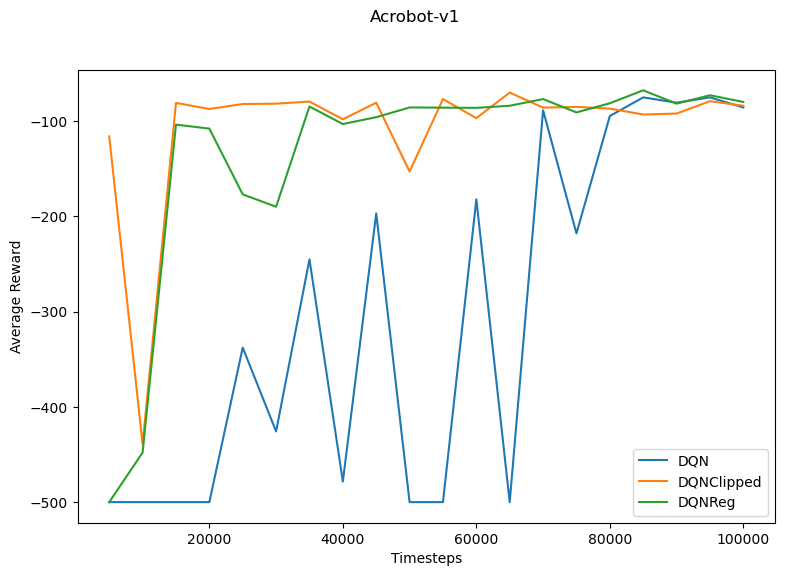

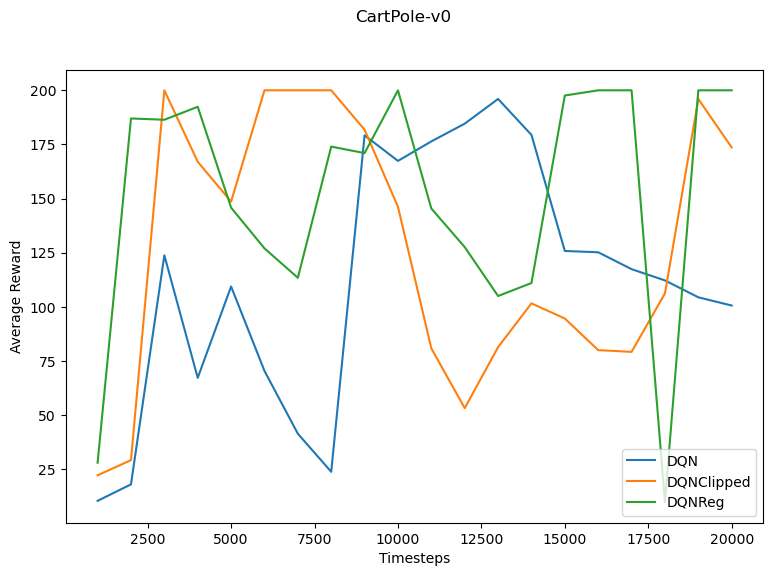

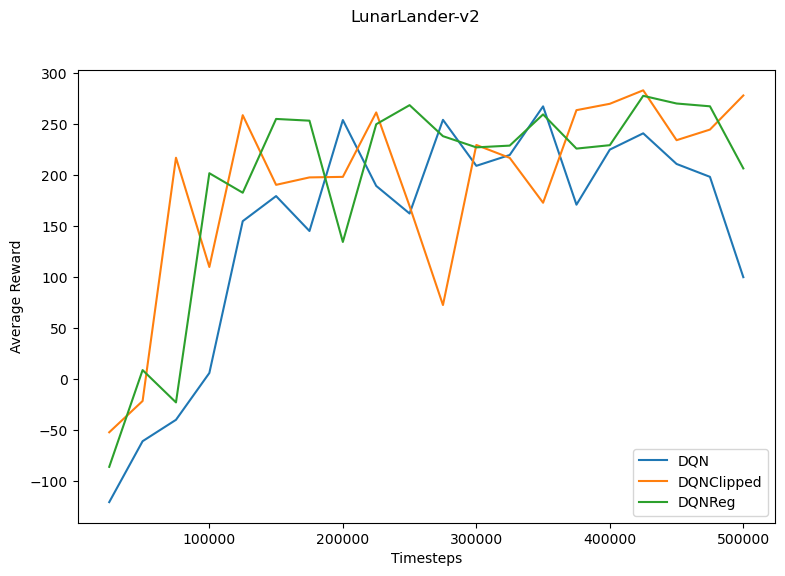

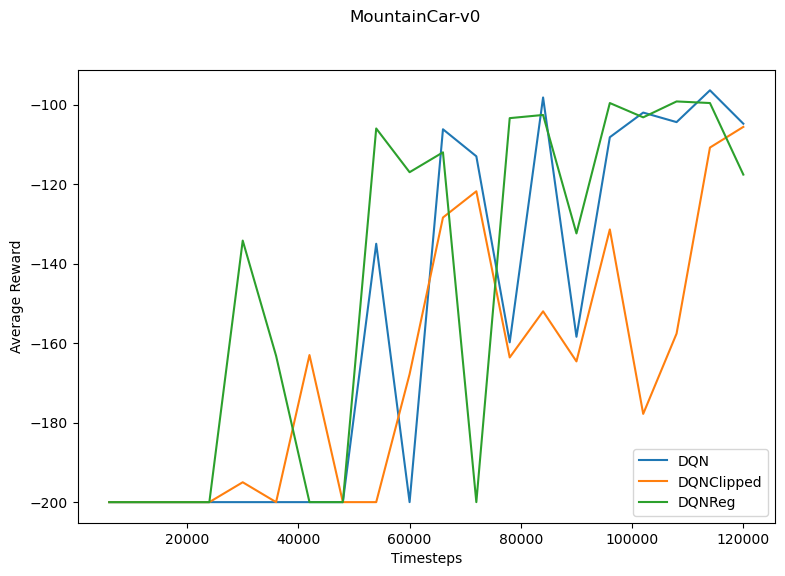

In [5]:
# one plot per env, each plot has a line per loss type
#keys in saved results are ['timesteps', 'results', 'ep_lengths']
for env_name in env_names_list:
    for loss_type in loss_list:
        key = env_name + "_" + str(loss_type)
        paths_to_load = paths_dict[key]
        evals = np.load(paths_to_load[0])
        ts = evals['timesteps']
        avg_r = np.mean(evals['results'],axis=1)
        avg_l = np.mean(evals['ep_lengths'],axis=1)
        for i in range(1, len(paths_to_load)):
            temp_r = np.mean(evals['results'],axis=1)
            temp_l = np.mean(evals['ep_lengths'],axis=1)
            avg_r = (temp_r + avg_r*i)/(i+1)
            avg_l = (temp_l + avg_l*i)/(i+1)
            
        plt.plot(ts, avg_r, label=loss_dict[loss_type])
    plt.ylabel('Average Reward')
    plt.xlabel('Timesteps')
    plt.legend(loc='lower right')
    plt.suptitle(env_name)
    plt.show()
# evals = np.load('eval_logs/dqn_evolve_rl_eval_Acrobot-v1_0_1_1614435654/evaluations.npz')
# avg_r = np.mean(evals['results'], axis=1)
# ts = evals['timesteps']
# avg_l = np.mean(evals['ep_lengths'], axis=1)

# plt.plot(ts, avg_r, label="DQN")
# plt.ylabel('Average Reward')
# plt.xlabel('Timesteps')
# plt.legend(loc='lower right')
# plt.show()
# avg_r = res